In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix


In [2]:
Japan = pd.read_csv('Cleaned Data/Japan.csv')
China = pd.read_csv('Cleaned Data/China.csv')
Korea = pd.read_csv('Cleaned Data/Korea.csv')
Singapore = pd.read_csv('Cleaned Data/Singapore.CSV')
Malaysia = pd.read_csv('Cleaned Data/Malaysia.CSV')
Highincome  = pd.read_csv('Cleaned Data/Highincome_DF.CSV')
UpperMidincome = pd.read_csv('Cleaned Data/UpperMidincome_DF.CSV')
#Japan.set_index('Year', inplace = True)
China.set_index('Year', inplace = True) 
Korea.set_index('Year', inplace = True)
Singapore.set_index('Year', inplace = True)
Malaysia.set_index('Year', inplace = True) 
Highincome.set_index('Year', inplace = True)
UpperMidincome.set_index('Year', inplace = True) 
Japan.dropna(inplace = True)
China.dropna(inplace = True)
Korea.dropna(inplace = True)
Singapore.dropna(inplace = True)
Singapore.dropna(inplace = True)
Malaysia.dropna(inplace = True)

In [3]:
features =['14 Under', '15 to 64', '64 Above', 'Female(%)']

def Test_Train(x):
    y = x['Work Population(%)'].pct_change()
    X = x[features].pct_change()
    y.dropna(inplace= True)
    X.dropna(inplace=True)
    y_train =  y[:40]
    y_test = y[40:]
    X_train =  X[:40]
    X_test =  X[40:]
    return (X_train, X_test, y_train, y_test)

In [4]:
from sklearn.preprocessing import MinMaxScaler
def OLS_Reg(x):
    X_train, X_test, y_train, y_test = Test_Train(x)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    result = sm.OLS(y_train, X_train).fit()
    return(result.summary())
print('Japan Summary:', OLS_Reg(Japan))
print('China Summary:', OLS_Reg(China))

Japan Summary:                                  OLS Regression Results                                
Dep. Variable:     Work Population(%)   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              3408.
Date:                Tue, 12 Jul 2022   Prob (F-statistic):                    7.04e-46
Time:                        19:10:19   Log-Likelihood:                          231.26
No. Observations:                  40   AIC:                                     -454.5
Df Residuals:                      36   BIC:                                     -447.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

Based on this, x1, which is the fertility rate, seems to have bigger signficance for China. Moreover, having more number of younger population seem to have positive coefficent than aging population.

In [5]:
from sklearn.neighbors import KNeighborsRegressor
empty = []
def KNNR(i, x):
        X_train, X_test, y_train, y_test = Test_Train(x)
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train_scale = scaler.transform(X_train)
        X_test_scale = scaler.transform(X_test)
        knn = KNeighborsRegressor(i)
        knn.fit(X_train_scale, y_train)
        prediction = knn.predict(X_test_scale)
        return(r2_score(prediction, y_test))
for i in range(1,30):
    empty.append(KNNR(i, China))
empty

[-0.16320683552525606,
 0.31320130275079183,
 0.15683294555698202,
 -0.026520824230812146,
 -0.13841363227111114,
 -0.22011884969473217,
 -0.28704699406274425,
 -0.4128748380600038,
 -0.5771265311395504,
 -0.6587697858878272,
 -0.6987466719528976,
 -0.9042833291934751,
 -1.1956732528278118,
 -1.423303025957181,
 -1.7648030274099078,
 -2.1482949673415557,
 -2.6324240669347643,
 -3.5014332491970253,
 -4.386235533117609,
 -4.998250686674798,
 -6.207659498236837,
 -7.695327686986348,
 -9.165168028050642,
 -10.505238003079992,
 -13.153013774151162,
 -16.387544637383925,
 -22.023071420404747,
 -27.44342755954574,
 -35.697667876870156]

-1.7859921581588107
0.31320130275079183
-8.527220899210564


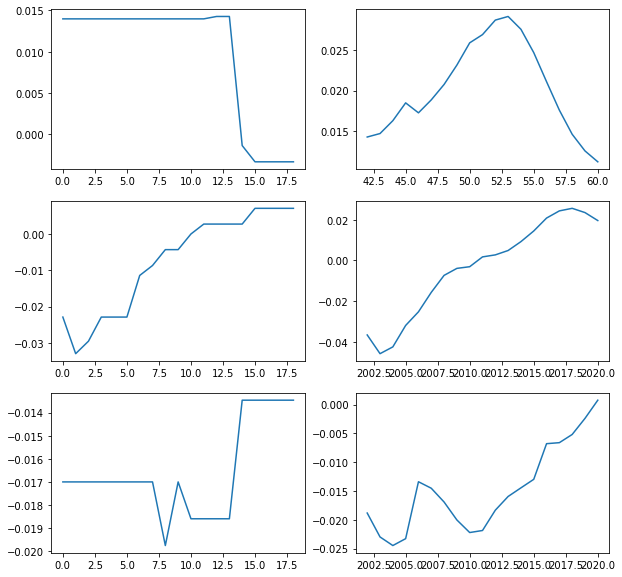

In [6]:
from sklearn.neighbors import KNeighborsRegressor
def KNNR(x):
        X_train, X_test, y_train, y_test = Test_Train(x)
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train_scale = scaler.transform(X_train)
        X_test_scale = scaler.transform(X_test)
        knn = KNeighborsRegressor(2)
        knn.fit(X_train_scale, y_train)
        prediction = knn.predict(X_test_scale)
        return(prediction, y_test, r2_score(prediction, y_test))
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].plot(KNNR(Japan)[0])
ax[0,1].plot(KNNR(Japan)[1])
ax[1,0].plot(KNNR(China)[0])
ax[1,1].plot(KNNR(China)[1])
ax[2,0].plot(KNNR(Malaysia)[0])
ax[2,1].plot(KNNR(Malaysia)[1])
print(KNNR(Japan)[2])
print(KNNR(China)[2])
print(KNNR(Malaysia)[2])


Japan: -93744.17584470051
China: 0.7588580039351047
Malaysia: 0.5725217417309725


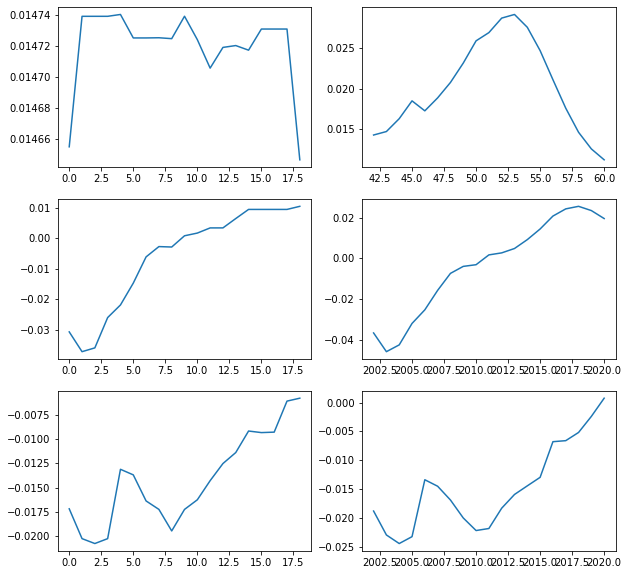

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
def Gradient(x):
    X_train, X_test, y_train, y_test = Test_Train(x)
    reg =GradientBoostingRegressor(random_state = 42)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.transform(X_train)
    X_test_scale = scaler.transform(X_test)
    reg.fit(X_train_scale, y_train)
    prediction = reg.predict(X_test_scale)
    return(prediction, y_test, r2_score(prediction, y_test))
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].plot(Gradient(Japan)[0])
ax[0,1].plot(Gradient(Japan)[1])
ax[1,0].plot(Gradient(China)[0])
ax[1,1].plot(Gradient(China)[1])
ax[2,0].plot(Gradient(Malaysia)[0])
ax[2,1].plot(Gradient(Malaysia)[1])
print('Japan:',Gradient(Japan)[2])
print('China:',Gradient(China)[2])
print('Malaysia:',Gradient(Malaysia)[2])

In [8]:
from sklearn.ensemble import RandomForestRegressor
empty = []
def RandomForest(i,x):
    (X_train, X_test, y_train, y_test) = Test_Train(x)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.fit_transform(X_test)
    regr = RandomForestRegressor(max_depth =i, random_state =42)
    regr.fit(X_train_scale, y_train)
    prediction = regr.predict(X_test_scale)
    return( r2_score(prediction, y_test))
for i in range(1,20):
    empty.append(RandomForest(i,China))
empty 

[-1.2903128690769772,
 0.6518137801023117,
 0.8353097085533218,
 0.8661645269479428,
 0.8594265415503606,
 0.8540665687340232,
 0.8652214978107217,
 0.8635572040843146,
 0.8640833729924577,
 0.8640833729924577,
 0.8640833729924577,
 0.8640833729924577,
 0.8640833729924577,
 0.8640833729924577,
 0.8640833729924577,
 0.8640833729924577,
 0.8640833729924577,
 0.8640833729924577,
 0.8640833729924577]

Japan: -4.093224335960707
China: 0.8661645269479428
Malaysia: 0.4454473469173563


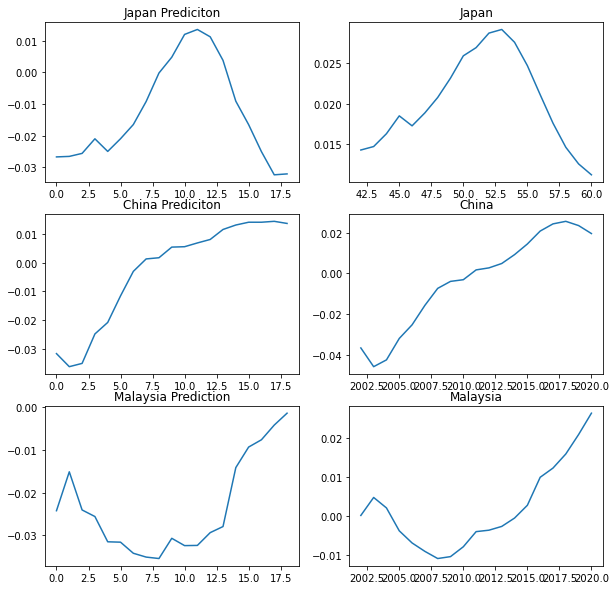

In [14]:
from sklearn.ensemble import RandomForestRegressor
def RandomForest(x):
    (X_train, X_test, y_train, y_test) = Test_Train(x)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.fit_transform(X_test)
    regr = RandomForestRegressor(max_depth = 4, random_state=42)
    regr.fit(X_train_scale, y_train)
    prediction = regr.predict(X_test_scale)
    return(prediction, y_test, r2_score(prediction, y_test))
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].plot(RandomForest(Japan)[0])
ax[0,0].set_title('Japan Prediciton')
ax[0,1].plot(RandomForest(Japan)[1])
ax[0,1].set_title('Japan')
ax[1,0].plot(RandomForest(China)[0])
ax[1,0].set_title('China Prediciton')
ax[1,1].plot(RandomForest(China)[1])
ax[1,1].set_title('China')
ax[2,0].plot(RandomForest(Korea)[0])
ax[2,0].set_title('Malaysia Prediction')
ax[2,1].plot(RandomForest(Korea)[1])
ax[2,1].set_title('Malaysia')
print('Japan:',RandomForest(Japan)[2])
print('China:',RandomForest(China)[2])
print('Malaysia:',RandomForest(Malaysia)[2])


summary:                               ARMA Model Results                              
Dep. Variable:     Work Population(%)   No. Observations:                   40
Model:                     ARMA(1, 0)   Log Likelihood                 136.847
Method:                       css-mle   S.D. of innovations              0.008
Date:                Tue, 12 Jul 2022   AIC                           -267.694
Time:                        19:10:24   BIC                           -262.628
Sample:                             0   HQIC                          -265.862
                                                                              
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0105      0.008     -1.242      0.214      -0.027       0.006
ar.L1.Work Population(%)     0.8728      0.077     11.298      0.000       0.721

C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

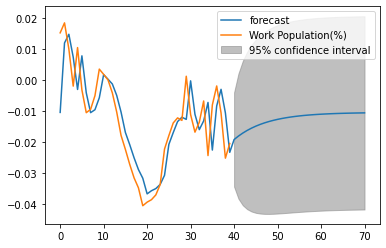

In [10]:
X_train, X_test, y_train, y_test = Test_Train(China)
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(y_train, order=(1,0))
res = mod.fit()

print("summary:",res.summary())
res.plot_predict(start=0, end=70)
plt.show()

[ 0. -0.  0.  0.]


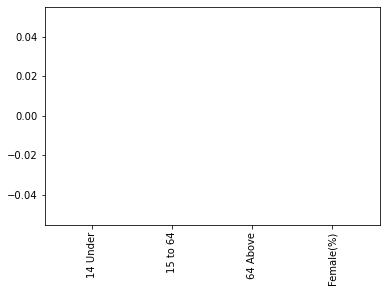

In [11]:
X_train, X_test, y_train, y_test = Test_Train(Japan)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit(X_train, y_train)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(X_train.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

[ 0. -0. -0.  0.]


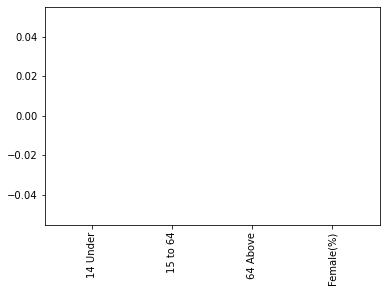

In [12]:
X_train, X_test, y_train, y_test = Test_Train(China)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.3)
lasso.fit(X_train, y_train)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(X_train.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

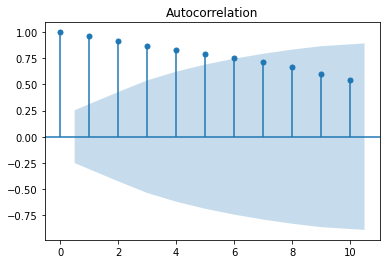

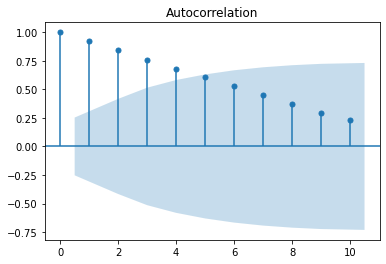

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Japan['GDP Per Capita'] ,lags=10)
plot_acf(China['GDP Per Capita'] ,lags=10)
plt.show()